# Tiny Neural Network: 2D Classification

This notebook trains a tiny neural network to classify 2D points by whether `x + y > 0`. It logs loss/accuracy, plots learning curves, and visualizes the decision boundary.

Run the cells top-to-bottom.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)
torch.manual_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [2]:
# Generate synthetic data
num_points = 1000
X = np.random.randn(num_points, 2)

y = (X[:, 0] + X[:, 1] > 0).astype(np.float32)

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1).to(device)

print("X shape:", X_tensor.shape)
print("y shape:", y_tensor.shape)

/home/doran/jupyterlab/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:283: UserWarning: 
    Found GPU0 NVIDIA GB10 which is of cuda capability 12.1.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (8.0) - (12.0)
    
  warnings.warn(


X shape: torch.Size([1000, 2])
y shape: torch.Size([1000, 1])


In [3]:
# Define a simple neural network
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

In [4]:
# Train the network
num_epochs = 200
loss_history = []
acc_history = []

for epoch in range(1, num_epochs + 1):
    model.train()
    optimizer.zero_grad()

    logits = model(X_tensor)
    loss = criterion(logits, y_tensor)
    loss.backward()
    optimizer.step()

    # Track loss and accuracy
    loss_history.append(loss.item())
    with torch.no_grad():
        preds = (torch.sigmoid(logits) > 0.5).float()
        acc = (preds == y_tensor).float().mean().item()
        acc_history.append(acc)

    if epoch % 20 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | Loss: {loss.item():.4f} | Acc: {acc*100:.2f}%")

Epoch 001 | Loss: 0.8415 | Acc: 18.30%
Epoch 020 | Loss: 0.1371 | Acc: 95.80%
Epoch 040 | Loss: 0.0440 | Acc: 99.40%
Epoch 060 | Loss: 0.0313 | Acc: 99.70%
Epoch 080 | Loss: 0.0261 | Acc: 99.80%
Epoch 100 | Loss: 0.0227 | Acc: 99.80%
Epoch 120 | Loss: 0.0201 | Acc: 99.90%
Epoch 140 | Loss: 0.0181 | Acc: 99.90%


Epoch 160 | Loss: 0.0164 | Acc: 99.90%
Epoch 180 | Loss: 0.0150 | Acc: 99.90%
Epoch 200 | Loss: 0.0138 | Acc: 99.90%


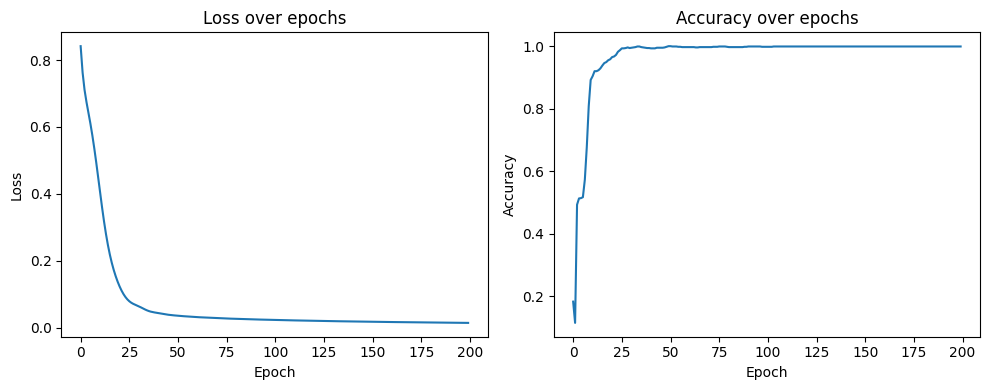

Final accuracy: 99.90%


In [5]:
# Visualize learning curves
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(acc_history)
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

print(f"Final accuracy: {acc_history[-1]*100:.2f}%")

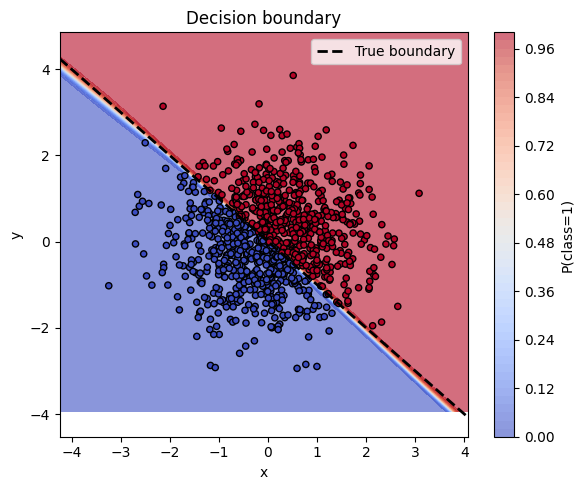

In [6]:
# Visualize decision boundary
model.eval()

# Create a grid of points covering the data range
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]

grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)
with torch.no_grad():
    logits = model(grid_tensor)
    probs = torch.sigmoid(logits).cpu().numpy().reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, probs, levels=50, cmap="coolwarm", alpha=0.6)
plt.colorbar(label="P(class=1)")

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", s=20)

# True boundary: x + y = 0  ->  y = -x
line_x = np.linspace(x_min, x_max, 200)
line_y = -line_x
plt.plot(line_x, line_y, "k--", linewidth=2, label="True boundary")
plt.legend(loc="upper right")

plt.title("Decision boundary")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()